In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
print(sys.version)

3.5.2 |Anaconda 2.4.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [3]:
pd.__version__

'0.21.0'

In [18]:
data = pd.read_csv('final_recall_data.csv')
print(len(data))

718240


In [5]:
data[:5]

,participant,ground_truth,recog_resp,recog_conf,recog_rt,participant_session,hmm
0,LTP268,old,old,5,1395.0,LTP2681,tp
1,LTP268,old,new,2,1788.0,LTP2681,fn
2,LTP268,old,new,3,2308.0,LTP2681,fn
3,LTP268,old,old,5,1320.0,LTP2681,tp
4,LTP268,old,old,5,1025.0,LTP2681,tp


In [6]:
# Defining the bins based on quantiles (~same amount of entities in each bin)
response_times = data['recog_rt'].values
bins = np.percentile(response_times,[20, 40, 60, 80, 100])

In [7]:
# Creating bins
conditions = [(data["recog_rt"] <= bins[0]),
              (data["recog_rt"] <= bins[1]),
              (data["recog_rt"] <= bins[2]),
              (data["recog_rt"] <= bins[3])]

choices = [1, 2, 3, 4]

data['bins'] = np.select(conditions, choices, default=5)

print('Bins:',bins)

y = data['bins'].values
l = [np.count_nonzero(y == x) for x in range(1,6)]
print('Elements in each bin:',l)
print('STD on elements in bins:',np.std(l))
print('Sum of elements in bins:',sum(l))
print('Size of data:',len(data))

Bins: [  607.   704.   816.  1024.  2999.]
Elements in each bin: [144242, 144339, 142558, 143464, 143637]
STD on elements in bins: 640.686194638
Sum of elements in bins: 718240
Size of data: 718240


In [8]:
data[8:16]

,participant,ground_truth,recog_resp,recog_conf,recog_rt,participant_session,hmm,bins
8,LTP268,old,new,3,1635.0,LTP2681,fn,5
9,LTP268,old,new,2,2430.0,LTP2681,fn,5
10,LTP268,old,new,1,2536.0,LTP2681,fn,5
11,LTP268,new,old,2,2040.0,LTP2681,fp,5
12,LTP268,new,new,2,2655.0,LTP2681,tn,5
13,LTP268,old,old,5,1205.0,LTP2681,tp,5
14,LTP268,old,old,5,989.0,LTP2681,tp,4
15,LTP268,old,old,5,806.0,LTP2681,tp,3


In [9]:
distribution = data.loc[:, ['bins', 'hmm', 'participant_session']].groupby(['hmm', 'bins']).count()
distribution

participant_session
hmm bins                     
fn  1                    3000
    2                    4328
    3                    7773
    4                   12603
    5                   18090
fp  1                   10355
    2                    5021
    3                    4997
    4                    6621
    5                   12324
tn  1                   11718
    2                   27161
    3                   44044
    4                   55557
    5                   55545
tp  1                  119169
    2                  107829
    3                   85744
    4                   68683
    5                   57678

In [10]:
# Creating the "RAW" section of "Table 1"
raw_new_lure = distribution.loc['tn']
raw_old_lure = distribution.loc['fp']
sum_raw_new_lure = sum(raw_new_lure.values)[0]
sum_raw_old_lure = sum(raw_old_lure.values)[0]
sum_raw_lure = sum_raw_new_lure + sum_raw_old_lure

raw_new_target = distribution.loc['fn']
raw_old_target = distribution.loc['tp']
sum_raw_new_target = sum(raw_new_target.values)[0]
sum_raw_old_target = sum(raw_old_target.values)[0]
sum_raw_target = sum_raw_new_target + sum_raw_old_target

print("Sum of lures (new):",sum_raw_lure)
print("Sum of targets (old):",sum_raw_target)

Sum of lures (new): 233343
Sum of targets (old): 484897


In [11]:
# Creaating the "ALL" section of "Table 1"
all_new_lure = raw_new_lure/sum_raw_lure
all_old_lure = raw_old_lure/sum_raw_lure
sum_all_new_lure = sum(all_new_lure.values)[0]
sum_all_old_lure = sum(all_old_lure.values)[0]
sum_all_lure = sum_all_new_lure + sum_all_old_lure

all_new_target = raw_new_target/sum_raw_target
all_old_target = raw_old_target/sum_raw_target
sum_all_new_target = sum(all_new_target.values)[0]
sum_all_old_target = sum(all_old_target.values)[0]
sum_all_target = sum_all_new_target + sum_all_old_target

print("Sum of lures (new):",sum_all_lure)
print("Sum of targets (old):",sum_all_target)

Sum of lures (new): 1.0
Sum of targets (old): 1.0


In [12]:
# Creaating the "REC" section of "Table 1"
rec_new_lure = raw_new_lure/sum_raw_new_lure
rec_old_lure = raw_old_lure/sum_raw_old_lure
sum_rec_new_lure = sum(rec_new_lure.values)[0]
sum_rec_old_lure = sum(rec_old_lure.values)[0]
sum_rec_lure = sum_rec_new_lure + sum_rec_old_lure

rec_new_target = raw_new_target/sum_raw_new_target
rec_old_target = raw_old_target/sum_raw_old_target
sum_rec_new_target = sum(rec_new_target.values)[0]
sum_rec_old_target = sum(rec_old_target.values)[0]
sum_rec_target = sum_rec_new_target + sum_rec_old_target

print("Sum of lures (new):",sum_rec_lure)
print("Sum of targets (old):",sum_rec_target)

Sum of lures (new): 2.0
Sum of targets (old): 2.0


In [13]:
# Creating "Table 2"
raw_fa = pd.concat([raw_old_lure.iloc[::-1], raw_new_lure ]).cumsum()
raw_hit = pd.concat([raw_old_target.iloc[::-1], raw_new_target ]).cumsum()
all_fa = [0] + list(np.transpose(raw_fa/sum_raw_lure).values[0])
all_hit = [0] + list(np.transpose(raw_hit/sum_raw_target).values[0])

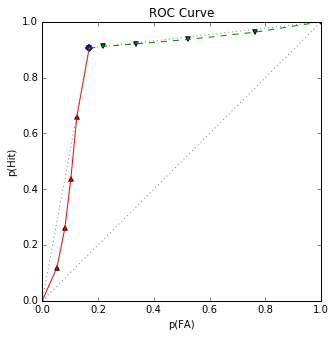

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5,5))
plt.title('ROC Curve')
plt.xlabel('p(FA)')
plt.ylabel('p(Hit)')
plt.axis(xmin=0, xmax=1, ymin=0, ymax=1)
plt.scatter(all_fa[:5], all_hit[:5], 20, c='r', marker='^')
plt.scatter(all_fa[5:], all_hit[5:], 20, c='g', marker='v')
plt.plot(all_fa[:6], all_hit[:6], c='r')
plt.plot(all_fa[5:], all_hit[5:], c='g', linestyle='--')
plt.plot([0, 1], [0, 1], c='gray', linestyle=':')
plt.plot([0, all_fa[5]], [0, all_hit[5]], c='gray', linestyle=':')
plt.plot([all_fa[5], 1], [all_hit[5], 1], c='gray', linestyle=':')
plt.scatter(all_fa[5], all_hit[5], 25, c='b', marker='D')

In [15]:
# Calculating ROC per participant in order to get d' per participant
from scipy.stats import norm
from scipy.integrate import trapz
from math import sqrt

distribution_grouped = data.loc[:, ['participant', 'bins', 'hmm', 'participant_session']].groupby(['participant', 'hmm', 'bins']).count()
participant_list = list(distribution_grouped.index.levels[0])
participant_criterion = dict()
participant_auc = dict()
for participant in participant_list:
    raw_new_lure = distribution_grouped.loc[participant, 'tn'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    raw_old_lure = distribution_grouped.loc[participant, 'fp'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    sum_raw_new_lure = sum(raw_new_lure.values)[0]
    sum_raw_old_lure = sum(raw_old_lure.values)[0]
    sum_raw_lure = sum_raw_new_lure + sum_raw_old_lure

    raw_new_target = distribution_grouped.loc[participant, 'fn'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    raw_old_target = distribution_grouped.loc[participant, 'tp'].reindex([1, 2, 3, 4, 5], fill_value=0, copy=False)
    sum_raw_new_target = sum(raw_new_target.values)[0]
    sum_raw_old_target = sum(raw_old_target.values)[0]
    sum_raw_target = sum_raw_new_target + sum_raw_old_target
    
    raw_fa = pd.concat([raw_old_lure.iloc[::-1], raw_new_lure ]).cumsum()
    raw_hit = pd.concat([raw_old_target.iloc[::-1], raw_new_target ]).cumsum()
    all_fa = [0] + list(np.transpose(raw_fa/sum_raw_lure).values[0])
    all_hit = [0] + list(np.transpose(raw_hit/sum_raw_target).values[0])
    
    auc = trapz(all_hit, all_fa)
    participant_auc[participant] = auc
    participant_criterion[participant] = sqrt(2) * norm.ppf(auc)

In [16]:
import pickle
pickle.dump(participant_auc, open( "recalled_auc_response_time.bin", "wb" ))

In [17]:
participant_auc

{'LTP063': 0.91897430163952032,
 'LTP064': 0.8679805364733022,
 'LTP065': 0.87214551310027633,
 'LTP066': 0.8395426022853042,
 'LTP067': 0.85601957028029096,
 'LTP069': 0.91914221503150428,
 'LTP070': 0.8349119310956119,
 'LTP073': 0.89661394245363457,
 'LTP074': 0.86924255388940574,
 'LTP075': 0.7648306441285696,
 'LTP076': 0.92746781298004699,
 'LTP077': 0.78730787868079155,
 'LTP079': 0.93087918628875543,
 'LTP081': 0.87964710043628047,
 'LTP082': 0.95988749570594289,
 'LTP084': 0.75204495830624063,
 'LTP085': 0.83164262734171757,
 'LTP086': 0.78329127450185321,
 'LTP087': 0.77845577421726841,
 'LTP088': 0.74517047348807575,
 'LTP089': 0.79914033818198027,
 'LTP090': 0.93525316608423437,
 'LTP091': 0.69861623990259125,
 'LTP092': 0.92042753629541085,
 'LTP093': 0.92540475690591162,
 'LTP094': 0.83063199838249802,
 'LTP095': 0.75865476414586919,
 'LTP096': 0.74193268232141563,
 'LTP098': 0.81863045735803031,
 'LTP099': 0.78697189887875185,
 'LTP100': 0.8165057082526842,
 'LTP101': 0.